# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import matplotlib.pyplot as plt
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i , n_units in (enumerate(num_neurons)):
        if i ==0 :
            x = keras.layers.Dense(units = n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units = n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            
    out = keras.layers.Dense(units = output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    
    return model

In [6]:
LR = [0.1, 0.01, 0.001]

In [7]:
def SGD (LEARNING_RATE):

    results = {}

    # 超參數設定
    EPOCHS = 50
    BATCH_SIZE = 256
    MOMENTUM = 0.95
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
    
        exp_name_tag = "exp-lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

    # 將實驗結果繪出
    color_bar = ["r", "g", "b", "y", "m", "k"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

In [8]:
def RMSprop (LEARNING_RATE):

    results = {}

    # 超參數設定
    
    EPOCHS = 50
    BATCH_SIZE = 256
    
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.RMSprop(lr=lr)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
    
        exp_name_tag = "exp-lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
    

    # 將實驗結果繪出
    color_bar = ["r", "g", "b", "y", "m", "k"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

In [9]:
def Adagrad (LEARNING_RATE):

    results = {}

    # 超參數設定
    
    EPOCHS = 50
    BATCH_SIZE = 256
    #MOMENTUM = 0.95
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.Adam(lr=lr)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
    
        exp_name_tag = "exp-lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

    # 將實驗結果繪出
    color_bar = ["r", "g", "b", "y", "m", "k"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

In [10]:
def Adam (LEARNING_RATE):

    results = {}

    # 超參數設定
    
    EPOCHS = 50
    BATCH_SIZE = 256
    #MOMENTUM = 0.95
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.Adagrad(lr=lr)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
    
        exp_name_tag = "exp-lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

    # 將實驗結果繪出
    color_bar = ["r", "g", "b", "y", "m", "k"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 2s 47us/step - loss: 1.4389 - accuracy: 0.4919 - val_loss: 1.6548 - val_accuracy: 0.4377
Epoch 50/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4331 - accuracy: 0.4952 - val_loss: 1.6395 - val_accuracy: 0.4334
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (D

50000/50000 [==============================] - 2s 45us/step - loss: 0.4074 - accuracy: 0.8528 - val_loss: 2.2396 - val_accuracy: 0.5165
Epoch 48/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.3856 - accuracy: 0.8614 - val_loss: 2.2979 - val_accuracy: 0.5177
Epoch 49/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.3674 - accuracy: 0.8689 - val_loss: 2.2729 - val_accuracy: 0.5224
Epoch 50/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.3485 - accuracy: 0.8741 - val_loss: 2.4304 - val_accuracy: 0.5009
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________________________

50000/50000 [==============================] - 2s 47us/step - loss: 0.9317 - accuracy: 0.6717 - val_loss: 1.4488 - val_accuracy: 0.5148
Epoch 46/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.9212 - accuracy: 0.6752 - val_loss: 1.5437 - val_accuracy: 0.4938
Epoch 47/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.9095 - accuracy: 0.6804 - val_loss: 1.4859 - val_accuracy: 0.5069
Epoch 48/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.9026 - accuracy: 0.6813 - val_loss: 1.3810 - val_accuracy: 0.5332
Epoch 49/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.8869 - accuracy: 0.6883 - val_loss: 1.3950 - val_accuracy: 0.5268
Epoch 50/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.8727 - accuracy: 0.6939 - val_loss: 1.3969 - val_accuracy: 0.5313


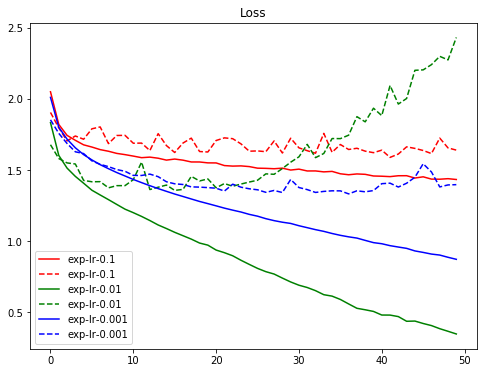

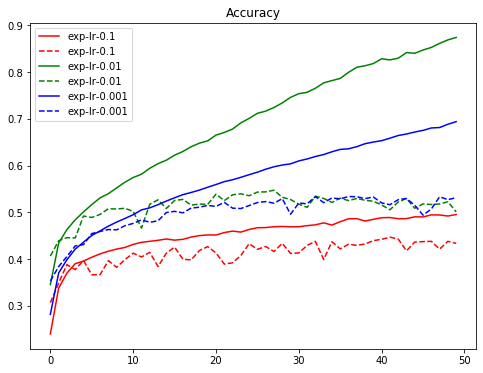

In [11]:
SGD(LR)

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.3079 - accuracy: 0.0999 - val_loss: 2.3153 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.3078 - accuracy: 0.1010 - val_loss: 2.3044 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_______________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.7619 - accuracy: 0.3623 - val_loss: 1.8111 - val_accuracy: 0.3444
Epoch 48/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.7565 - accuracy: 0.3636 - val_loss: 1.8785 - val_accuracy: 0.3271
Epoch 49/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.7654 - accuracy: 0.3623 - val_loss: 1.8027 - val_accuracy: 0.3362
Epoch 50/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.7557 - accuracy: 0.3656 - val_loss: 1.8247 - val_accuracy: 0.3389
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_______________________________

50000/50000 [==============================] - 2s 48us/step - loss: 0.8313 - accuracy: 0.7017 - val_loss: 1.8352 - val_accuracy: 0.4730
Epoch 46/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.8213 - accuracy: 0.7063 - val_loss: 2.0031 - val_accuracy: 0.4747
Epoch 47/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.8100 - accuracy: 0.7109 - val_loss: 1.8251 - val_accuracy: 0.4792
Epoch 48/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.7928 - accuracy: 0.7166 - val_loss: 1.9302 - val_accuracy: 0.4848
Epoch 49/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.7864 - accuracy: 0.7172 - val_loss: 1.9729 - val_accuracy: 0.4816
Epoch 50/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.7737 - accuracy: 0.7231 - val_loss: 1.9483 - val_accuracy: 0.4840


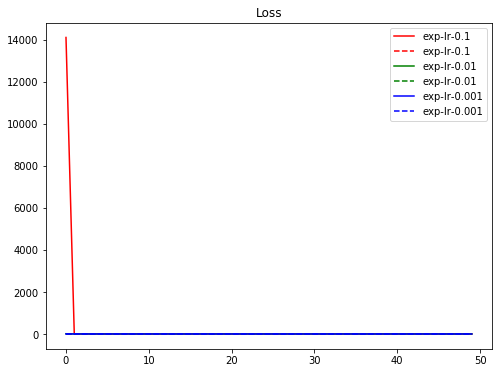

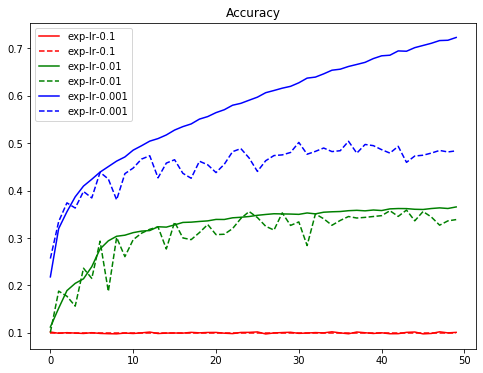

In [12]:
RMSprop(LR)

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.3071 - accuracy: 0.1015 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.3072 - accuracy: 0.1002 - val_loss: 2.3101 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_______________________________________________________________

50000/50000 [==============================] - 3s 51us/step - loss: 1.6800 - accuracy: 0.3959 - val_loss: 1.7190 - val_accuracy: 0.3810
Epoch 48/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6783 - accuracy: 0.3928 - val_loss: 1.7134 - val_accuracy: 0.3778
Epoch 49/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6828 - accuracy: 0.3922 - val_loss: 1.6993 - val_accuracy: 0.3802
Epoch 50/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6805 - accuracy: 0.3923 - val_loss: 1.6897 - val_accuracy: 0.3871
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________________________

50000/50000 [==============================] - 3s 50us/step - loss: 0.7162 - accuracy: 0.7443 - val_loss: 1.6458 - val_accuracy: 0.5195
Epoch 46/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.6894 - accuracy: 0.7550 - val_loss: 1.7169 - val_accuracy: 0.5182
Epoch 47/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.6770 - accuracy: 0.7598 - val_loss: 1.7213 - val_accuracy: 0.5189
Epoch 48/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.6781 - accuracy: 0.7561 - val_loss: 1.7503 - val_accuracy: 0.5177
Epoch 49/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.6609 - accuracy: 0.7663 - val_loss: 1.7718 - val_accuracy: 0.5204
Epoch 50/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.6366 - accuracy: 0.7745 - val_loss: 1.8318 - val_accuracy: 0.5130


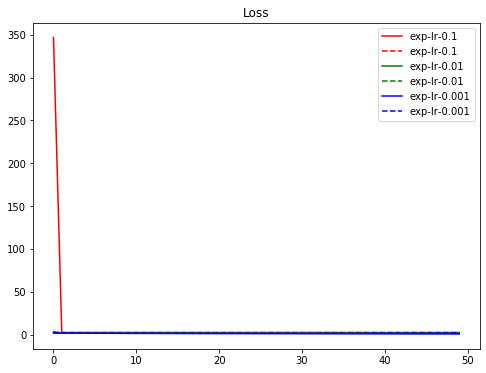

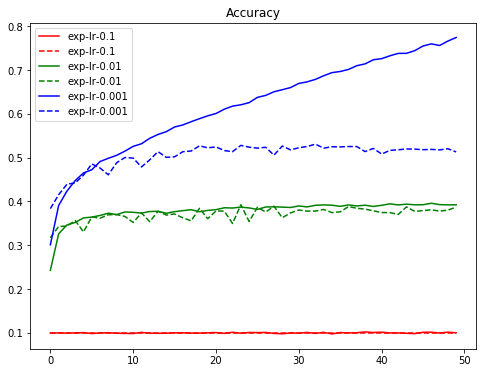

In [13]:
Adagrad(LR)

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 2s 47us/step - loss: 2.3026 - accuracy: 0.0994 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 2s 47us/step - loss: 2.3026 - accuracy: 0.0961 - val_loss: 2.3038 - val_accuracy: 0.1001
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_______________________________________________________________

50000/50000 [==============================] - 2s 49us/step - loss: 1.0730 - accuracy: 0.6248 - val_loss: 1.4589 - val_accuracy: 0.4962
Epoch 48/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.0651 - accuracy: 0.6273 - val_loss: 1.3883 - val_accuracy: 0.5184
Epoch 49/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.0596 - accuracy: 0.6294 - val_loss: 1.3952 - val_accuracy: 0.5167
Epoch 50/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.0578 - accuracy: 0.6287 - val_loss: 1.3826 - val_accuracy: 0.5158
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________________________

50000/50000 [==============================] - 2s 48us/step - loss: 1.2709 - accuracy: 0.5595 - val_loss: 1.3737 - val_accuracy: 0.5120
Epoch 46/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.2652 - accuracy: 0.5603 - val_loss: 1.3776 - val_accuracy: 0.5102
Epoch 47/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.2607 - accuracy: 0.5627 - val_loss: 1.3967 - val_accuracy: 0.5004
Epoch 48/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.2568 - accuracy: 0.5640 - val_loss: 1.3720 - val_accuracy: 0.5064
Epoch 49/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.2533 - accuracy: 0.5647 - val_loss: 1.3632 - val_accuracy: 0.5168
Epoch 50/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.2491 - accuracy: 0.5677 - val_loss: 1.3999 - val_accuracy: 0.5056


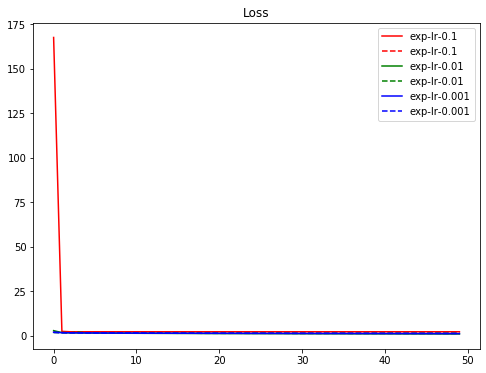

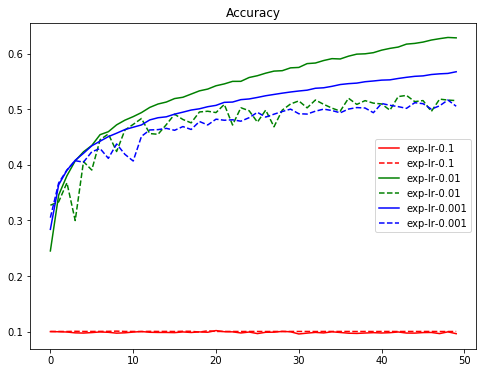

In [14]:
Adam(LR)